# HW 3

## set up

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## this sets some style parameters
sns.set()

## part 1

In [2]:
kirb21_df = pd.read_csv("https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv")

In [3]:
kirby906a_ax_df = kirb21_df[kirb21_df['rawid'] == "kirby906a_ax.img"]

t1l1 = kirby906a_ax_df[(kirby906a_ax_df['level']== 1) & (kirby906a_ax_df['type']== 1)] 

telencephalon_L_volume = t1l1.loc[t1l1['roi'] == 'Telencephalon_L']['volume'].item()

print(telencephalon_L_volume)

telencephalon_R_volume = t1l1.loc[t1l1['roi'] == 'Telencephalon_R']['volume'].item()

print(telencephalon_R_volume)

ICV_fraction = (telencephalon_R_volume + telencephalon_L_volume) / t1l1.loc[t1l1['roi'] == 'Telencephalon_L']['icv'].item()

print(ICV_fraction)

TBV_fraction = (telencephalon_R_volume + telencephalon_L_volume) / t1l1.loc[t1l1['roi'] == 'Telencephalon_L']['tbv'].item()

TBV_fraction

467063
470488
0.7845516583473847


0.8348063710737297

In [4]:
all_regions_df = kirby906a_ax_df[['type','level','volume']].groupby(['type', 'level'], as_index = False).sum().rename(columns = {'volume':'total_volume'})
all_regions_df.head()

,type,level,total_volume
0,1,1,1195015
1,1,2,1195021
2,1,3,1195034
3,1,4,1195065
4,1,5,1195124


In [5]:
t1l2 = kirby906a_ax_df[(kirby906a_ax_df['level']== 2) & (kirby906a_ax_df['type']== 1)].copy()

t1l2['icv_frac'] = (t1l2['volume'] / t1l2['icv'])

t1l2['roi_abr'] = t1l2['roi'].apply(lambda x: x[:-2])

t1l2_summary = t1l2[['roi_abr','icv_frac']].groupby('roi_abr').sum().reset_index().rename(columns = {'roi_abr':'Region','icv_frac':'ICV Fraction'})


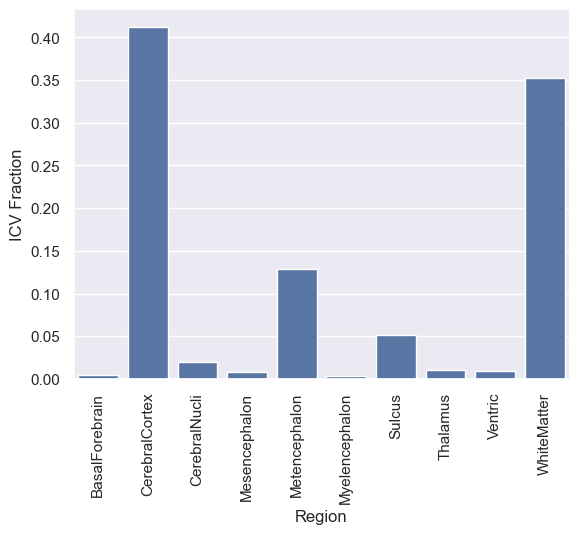

In [6]:
sns.barplot(x='Region', y = 'ICV Fraction', data = t1l2_summary)
plt.xticks(rotation = 90);

In [7]:
t1l3 = kirby906a_ax_df[(kirby906a_ax_df['level']== 3) & (kirby906a_ax_df['type']== 1)].copy()

t1l3['roi_abr'] = t1l3['roi'].apply(lambda x: x[:-2])

t1l3 = t1l3[['roi_abr','volume']].groupby('roi_abr', as_index = False).sum()


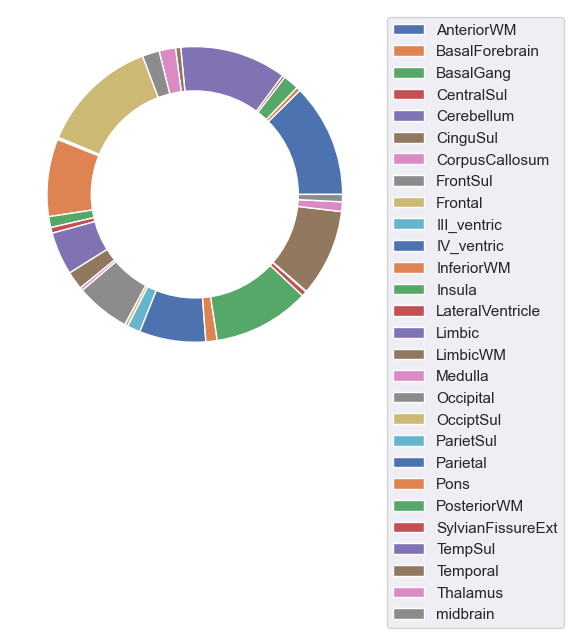

In [8]:
labels = t1l3['roi_abr']

plt.pie(t1l3['volume']);
plt.legend(labels, bbox_to_anchor=(1, 1))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


## part 2

In [9]:
class_interests_df = pd.read_csv('https://github.com/bcaffo/ds4ph-bme/raw/master/data/classInterests.txt',delimiter=r"\s+")
class_interests_df.head()

,Year,Program
0,Master's,BME
1,Master's,BME
2,Senior,BME
3,PhD,BME
4,PhD,Computer_Science


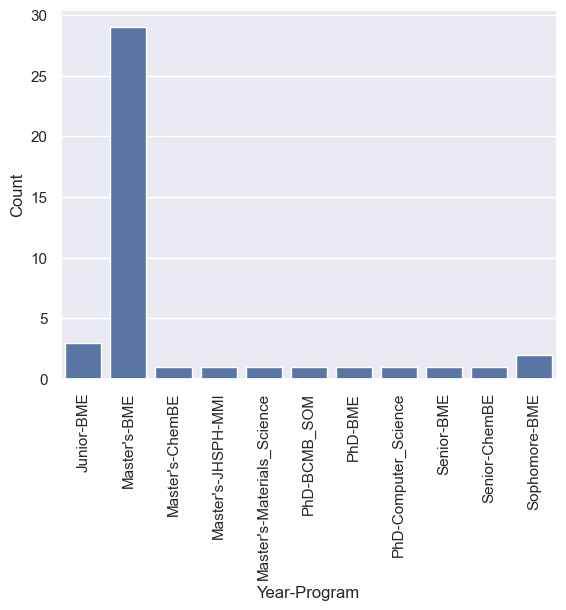

In [10]:

class_interests_summary = class_interests_df.groupby(['Year','Program'], as_index= False).size().reset_index().rename(columns = {'size':'Count'})

class_interests_summary['Year-Program'] = (class_interests_summary['Year'] + "-" + class_interests_summary['Program'])

sns.barplot(x = 'Year-Program', y = 'Count', data = class_interests_summary)
plt.xticks(rotation = 90);

## part 3

In [11]:
gene_expression_df = pd.read_csv('https://github.com/jhu-advdatasci/2018/raw/master/data/GSE5859_exprs.csv')

In [12]:
gene_expression_df_pt1 = gene_expression_df.drop('Unnamed: 0', axis = 1).apply(lambda x: x - x.mean(), axis=1)

In [13]:
gene_expression_df_pt2 = gene_expression_df_pt1.apply(lambda x: x - x.mean())

In [14]:
gene_expression_df_pt3 = gene_expression_df_pt2.apply(lambda x: x / x.std())

## part 4

In [15]:
healthcare_df = pd.read_csv('https://raw.githubusercontent.com/jhu-advdatasci/2018/master/data/KFF/healthcare-spending.csv', skiprows = 2)

In [16]:
healthcare_df_pivot = healthcare_df.melt(id_vars='Location')[['Location','value']].groupby('Location').mean().dropna().drop('United States').reset_index()

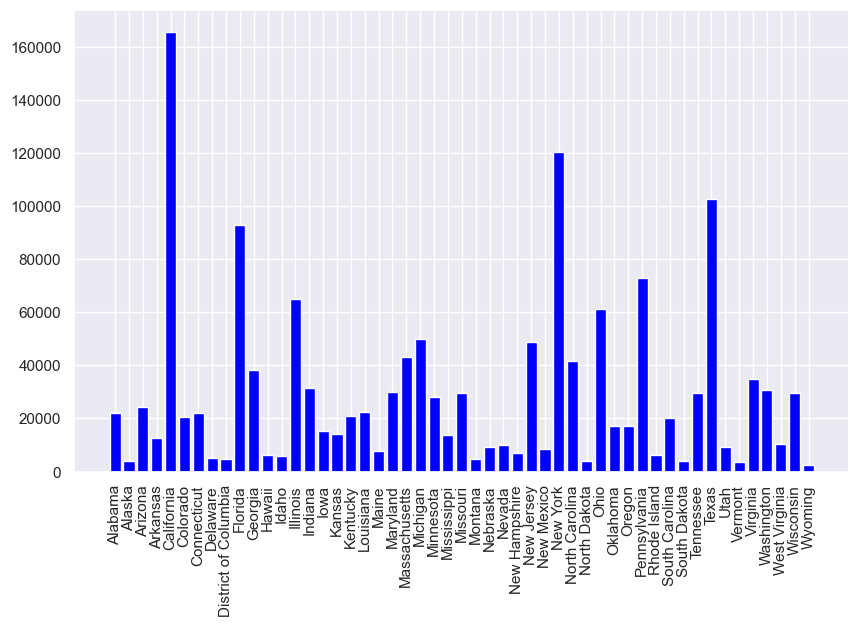

In [17]:
fig, ax = plt.subplots(figsize=(10, 6)) 
ax.bar(healthcare_df_pivot['Location'], healthcare_df_pivot['value'], width = 0.8, data = healthcare_df_pivot, color = "blue")
plt.xticks(rotation=90);
